# Individual Project Planning Assignment - Ada Breker, 73231185
November 13, 2025

**(1) Data Description**

<u>Players dataset<u>

- Data collected using a website embedded with Minecraft, players inputted their personal data (age, gender, experience) and website tracked players time in game
- 196 observations
- 7 variables


$$\text{Overview Table}$$

| Variable name | Type of variable | What variable means | Summary statistics (if applicable) |
| :------- | :------: | -------: |-------: |
| Experience | Character | The experience each player has | NA |
| Subscribe | Logical | Whether the player has subscribed to a game-related newsletter | FALSE: 52, TRUE: 144  |
| Hashed email | Character | The encrypted email each player put in | NA |
| Played hours | Double | The number of hours each player played | Min: 0.00, Median: 0.10, Mean: 5.85, Max: 223.10 |
| Name | Character | The players names | NA |
| Gender | Character | The self-identified gender of each player | NA |
| Age | Double | Each players age | Min: 9.00, Median: 19.00, Mean: 21.14, Max: 58.00 |


-
Problems in the data
    * Somewhat small dataset
   * Majority of played hours are less than one hour
  * Majority of the players self-identify as male
 * The age of players is also skewed towards ages 17-19

These issues mean the data is weighted more towards the majority of each of the variables. This makes prediction questions difficult as each of the variables show bias.

**(2) Questions** 

Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question: Can player experience and played hours predict if a player will subscribe to a game-related newsletter in the Players data set?

**(3) Exploratory Data Analysis and Visualization** 

(Mean values shown in summary statistics above)

In [8]:
library(tidyverse)
library(repr)
library(tidymodels)

In [9]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [10]:
# Use the summary function to find the minimums, means, medians and maxes of the non character values
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [11]:
#As this data looks already tidy (each variable forms a column, observation forms a row and each cell is a single measurement) 
#we can begin with starting to wrangle the data

# Select columns needed for future analysis
players_selected <- players |>
    select(subscribe, experience, played_hours)

# As most players played under one hour, filter the played hours column to make the variable played hours less biased
players_filtered <- players_selected |>
    filter(played_hours < 1.0)
players_filtered

subscribe,experience,played_hours
<lgl>,<chr>,<dbl>
FALSE,Veteran,0.0
TRUE,Amateur,0.7
TRUE,Regular,0.1
TRUE,Amateur,0.0
TRUE,Regular,0.0
FALSE,Amateur,0.0
TRUE,Amateur,0.1
TRUE,Veteran,0.0
TRUE,Pro,0.0


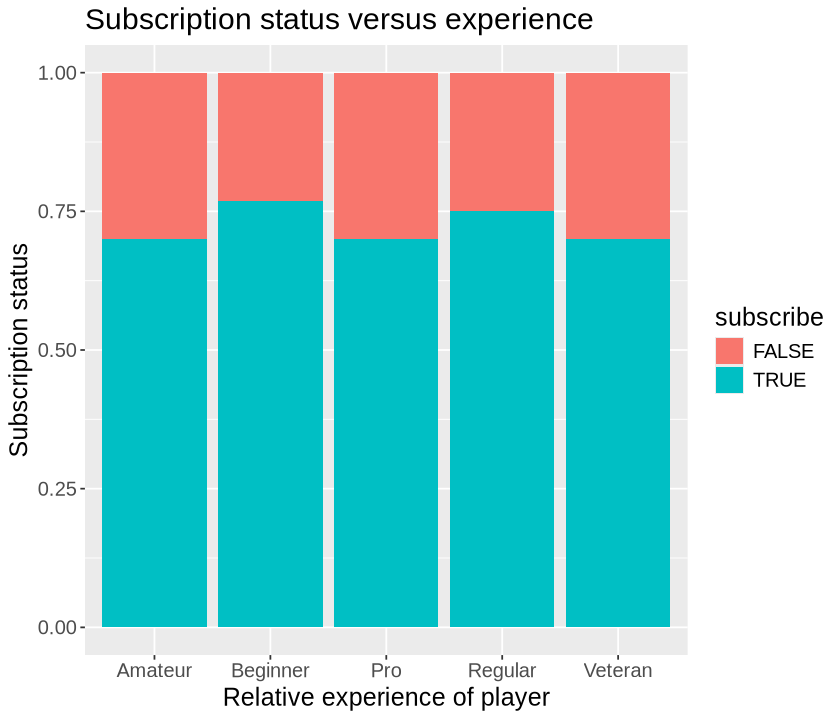

In [13]:
# Lets visualize the relationship between experience and subscription first
options(repr.plot.width = 7, repr.plot.height = 6)
experience_plot <- players_filtered |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    xlab("Relative experience of player") +
    ylab("Subscription status") +
    ggtitle("Subscription status versus experience") +
    theme(text = element_text(size = 15))
experience_plot

We see that beginner and regular experienced players had the highest subscription rate compared to non subscription rate. This graph confirms that this may be a good variable to use to predict subscription rate.

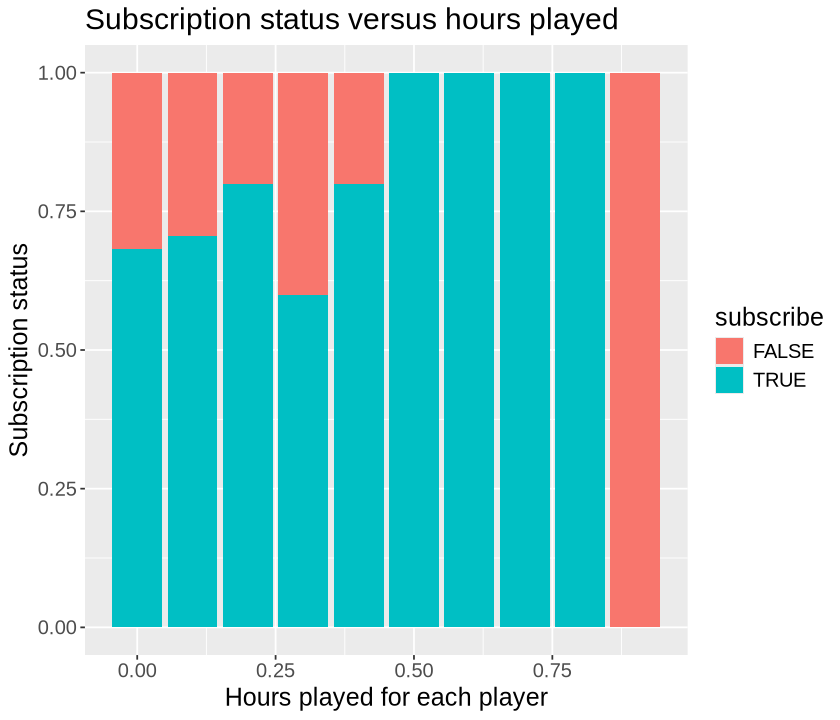

In [14]:
#Now lets visualize subscription versus played hours
options(repr.plot.width = 7, repr.plot.height = 6)
hours_plot <- players_filtered |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_bar(position = "fill") +
    xlab("Hours played for each player") +
    ylab("Subscription status") +
    ggtitle("Subscription status versus hours played") +
    theme(text = element_text(size = 15))
hours_plot

From the visualization above, we see that there is a kind of linear relationship between if the players subscribed or not from 0 hours to 0.75 hours but drops just before 1 hour. This is also good to see as it means it may be a good variable for prediction.

**(4) Methods and Plan** 

I plan to use Knn-classification to predict if a player will subscribe to a game-related newsletter based on their experience level and hours played. This is appropriate as there are more than two variables which can be used to predict a classifer (True or False). 

As stated above, since the majority of players played under one hour, I will use only the players under one hour to make the prediction more realistic. There are limitations as the data set given as it is small and through filtering the data, the observations become even smaller.

Initially I will shuffle the data to make sure there is randomness in the data set and then split the data to obtain training and testing sets. To split the data, I will use a proportion of 0.75 (which is somewhat high) as it is not a large dataset and therefore to maximize success I will increase the data in the training set. Increasing the training set will make the model more realistic as there will be more data points to base future analyses off of and less noise. 

I will use cross-validation to select k. I will complete another split to make a second training set and a validation set. To ensure that I have enough observations in each fold, I will set the fold number to 4. This maximizes the folds but also gives each of the folds a large enough number of data points. I will calculate the cross-validation accuracy for each of my folds (and total cross-validation accuracy) and tailor the number of folds if I am not happy with the results. I will choose k to maximize validation performance. 

Finally, I will predict the testing data using my found k and calculate its final accuracy. I will visualize how accurate my model is as a whole in the end by plotting it against my data. The right model will follow the overall trend of the data, is not too sensitive to noise and does not ignore useful data.